In [72]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

In [86]:
cleanmeta = pd.read_csv("actormetaMonths.csv")
cleanmeta = cleanmeta[['budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']]
cleanmeta = cleanmeta.dropna()
cleanmeta = cleanmeta.reset_index()
X = cleanmeta.values
y = cleanmeta['revenue']/cleanmeta['budget'].values

In [87]:
np.median(y)

2.057193

In [88]:
bo =0
uo =0
for i in range(0,len(y)):
    if y[i] > 2:
        y[i] = 0 #success
        uo += 1
    else:
        y[i] = 2 #failure
        bo += 1

In [89]:
y[4]

2.0

In [90]:
bo

2637

In [91]:
uo

2744

In [92]:
X_train = X[:4500]
X_test = X[4500:]

y_train = y[:4500]
y_test = y[4500:]
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)
#reg.coef_
# reg.intercept_ 
#reg.predict(np.array([[3, 5]]))b

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
clf.score(X_test,y_test)

0.9988649262202043

In [94]:
print(y_pred[0:10])
print(y_test[0:10])

[ 0.80490857  1.1230682   1.02346871  1.06297395  0.12145034 -0.17280988
  1.124911    1.10795344  0.91032901  0.62831239]
4500    0.0
4501    0.0
4502    2.0
4503    0.0
4504    0.0
4505    0.0
4506    2.0
4507    2.0
4508    0.0
4509    0.0
Name: revenue, dtype: float64


In [95]:
print('Coefficients budget: \n', clf.coef_[0])
print('Coefficients revenue: \n', clf.coef_[1])
print('Coefficients popularity: \n', reg.coef_[2])
print('Coefficients runtime: \n', reg.coef_[3])
print('Coefficients castRevBudRatio: \n', reg.coef_[4])

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients budget: 
 4.5934582050153515e-05
Coefficients revenue: 
 1.154842250119538e-08
Coefficients popularity: 
 -4.341570096101267e-09
Coefficients runtime: 
 -0.0007465934645141096
Coefficients castRevBudRatio: 
 0.00015716987095203025
Mean squared error: 0.85
Variance score: 0.15


In [59]:
y_pred

array([ 0.24364548,  0.38280175,  0.33866421,  0.15877003, -0.54940874,
       -0.41223976,  0.38063017,  0.33341352,  0.1771122 ,  0.11027953,
       -0.40997965,  0.37453797,  0.3233866 ,  0.22775783,  0.29727576,
        0.39414757,  0.29369573,  0.32141656,  0.39616558,  0.42420172,
        0.30150395,  0.28799667,  0.55940092,  0.04901581,  0.34127514,
        0.21211253,  0.49543857,  0.37818626,  0.44828679,  0.29656044,
        0.40510333,  0.33224683,  0.46350562,  0.32800862,  0.49050996,
        0.48515871,  0.51291055,  0.30780569,  0.53321851,  0.48757307,
        0.46496841, -0.18715151,  0.37157379,  0.40248436,  0.44774051,
        0.46100517,  0.45135616,  0.42448736,  0.35017996,  0.48559746,
        0.48566259,  0.45931541, -0.25277067,  0.48295351,  0.04448185,
        0.30316688,  0.05210389,  0.41346942,  0.3773996 ,  0.43927138,
       -0.42047391,  0.39460682,  0.19930019,  0.36298637,  0.35955144,
        0.37452173,  0.41978599,  0.28089551,  0.32951161,  0.48

In [17]:
#number = []
b = []
r =[]
p=[]
run = []
castrb = []
for i in range(0,len(X_test)):
    #number.append(i)
    b.append(X_test[i][0]) #budget
    r.append(X_test[i][1]) #revenue
    p.append(X_test[i][2]) #popularity
    run.append(X_test[i][3]) #runtime
    castrb.append(X_test[i][4]) #castRevBudRatio


Text(0.5,0,'budget')

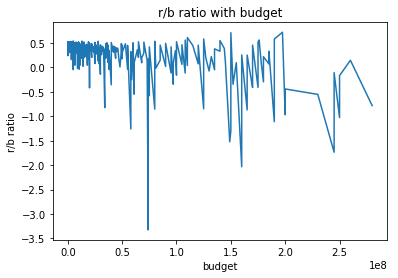

In [58]:
b_sorted, y_pred_sorted = zip(*sorted(zip(b, y_pred)))
plt.plot(b_sorted,y_pred_sorted)
plt.title("r/b ratio with budget")
plt.ylabel("r/b ratio")
plt.xlabel("budget")

Text(0.5,0,'revenue')

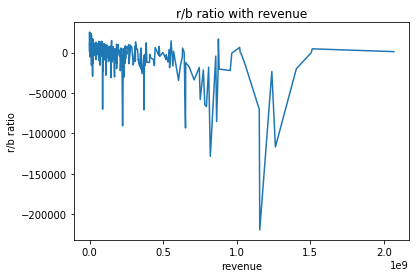

In [22]:
r_sorted, y_pred_sorted = zip(*sorted(zip(r, y_pred)))
plt.plot(r_sorted,y_pred_sorted)
plt.title("r/b ratio with revenue")
plt.ylabel("r/b ratio")
plt.xlabel("revenue")

Text(0.5,0,'popularity')

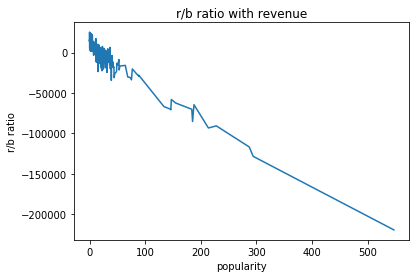

In [24]:
p_sorted, y_pred_sorted = zip(*sorted(zip(p, y_pred)))
plt.plot(p_sorted,y_pred_sorted)
plt.title("r/b ratio with revenue")
plt.ylabel("r/b ratio")
plt.xlabel("popularity")

Text(0.5,0,'runtime')

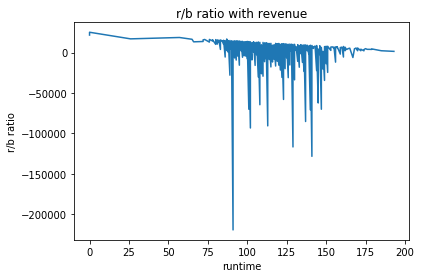

In [25]:
run_sorted, y_pred_sorted = zip(*sorted(zip(run, y_pred)))
plt.plot(run_sorted,y_pred_sorted)
plt.title("r/b ratio with revenue")
plt.ylabel("r/b ratio")
plt.xlabel("runtime")

Text(0.5,0,'castrb')

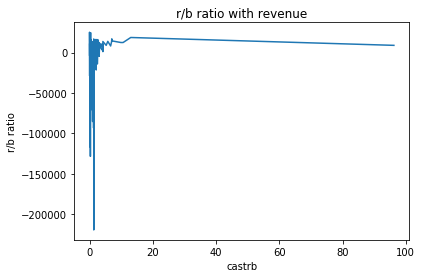

In [26]:
castrb_sorted, y_pred_sorted = zip(*sorted(zip(castrb, y_pred)))
plt.plot(castrb_sorted,y_pred_sorted)
plt.title("r/b ratio with revenue")
plt.ylabel("r/b ratio")
plt.xlabel("castrb")

In [27]:
castrb

[1.6291695671408586,
 0.0,
 0.0,
 1.7455371932568458,
 0.4604500140244602,
 0.5136621574886816,
 0.7246955165790558,
 0.5634120305096157,
 0.5999333819994279,
 0.4351270056381452,
 2.0968972581253613,
 0.9926817767013332,
 3.0399979018509438,
 0.8499540581913576,
 0.6977247501898328,
 0.608638395120459,
 0.3375094286974049,
 0.0,
 0.8360886856205368,
 0.36061982857142855,
 0.5391620931409272,
 0.26438777823949555,
 0.2684805295144758,
 0.4748869413079924,
 0.38443534201353496,
 0.3006297916614313,
 0.0,
 0.9902657793939392,
 0.8648342723408888,
 96.25694736647287,
 0.0,
 0.0,
 0.6008130640284978,
 0.25,
 0.7173351320451334,
 1.211775265735043,
 3.0310197530021203,
 0.255050133816837,
 1.311286860069894,
 0.0,
 0.7201980475616696,
 0.11965056710121888,
 0.15135394087301587,
 0.8378432426020408,
 0.21823561193945906,
 2.2362789155738185,
 0.6169012570582258,
 1.472755852337737,
 0.2863946372633196,
 1.062309334160784,
 2.305733201195312,
 0.2333882594052877,
 0.09132335958504803,
 1.8484